# Pittsburgh's Best Overall Neighborhood

To determine the best overall neighborhood in the city of Pittsburgh, the three of us in this group decided to analyze the data from three metrics:
* Capital Projects: To determine which of Pittsburgh's neighborhoods had the largest monetary budget
* (30 Day) Police Incident Blotter: To determine which of Pittsburgh's neighborhoods had the least amount of reported crimes
* 311 Requests: To determine which of Pittsburgh's neighborhoods had the least amount of reported infrastructure issues

Let's take a look at the data from Capital Projects, analyzed by Mark Marquez, to start:

# First Metric: Capital Projects

For a neighborhood to be considered as the best by this metric, it must have the largest budget out of all the others.

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
projects = pd.read_csv("capital_projects.csv", index_col="id") 

In [5]:
print(projects['neighborhood'].unique(), "\n", len(projects['neighborhood'].unique()))

['Manchester' 'Banksville' 'Central Oakland' 'Greenfield' 'Swisshelm Park'
 'Allegheny West' 'South Side Flats' 'Squirrel Hill North'
 'Central Business District' 'Squirrel Hill South' 'Mount Washington'
 'Carrick' 'South Side Slopes' 'Beltzhoover' 'Brookline' 'South Oakland'
 'Lincoln Place' 'Troy Hill' 'Shadyside' 'Elliott' 'Larimer'
 'Crafton Heights' 'Central Lawrenceville' 'East Liberty'
 'Lower Lawrenceville' 'Sheraden' 'Windgap' 'Fineview'
 'Spring Hill-City View' 'Allegheny Center' 'Perry North' 'Polish Hill'
 'East Allegheny' 'Morningside' 'Homewood North' 'Allentown' 'Perry South'
 'Upper Lawrenceville' 'Bloomfield' 'Strip District' nan 'Hazelwood'
 'Homewood South' 'Garfield' 'Highland Park' 'Beechview'
 'Brighton Heights' 'Point Breeze' 'Upper Hill' 'Fairywood'
 'Crawford-Roberts' 'Lincoln-Lemington-Belmar' 'Terrace Village'
 'East Hills' 'Middle Hill' 'California-Kirkbride' 'Central Northside'
 'Overbrook' 'Glen Hazel' 'Hays' 'Stanton Heights' 'West End'
 'Spring Garden' '

Let's see how many projects each neighborhood has and how much they all cost.

In [10]:
projects2 = projects.groupby(['neighborhood','status','budgeted_amount']).size()
print(projects2)

neighborhood               status       budgeted_amount
Allegheny Center           Completed    4000.00            1
                                        5200.00            1
                                        38244.00           1
                                        55000.00           1
                                        57000.00           1
                                        91687.50           1
                           In Progress  90000.00           1
                                        735343.00          1
                                        741196.00          1
                           Planned      2500.00            1
                                        6000.00            1
                                        8000.00            1
                                        13000.00           1
                                        15600.00           1
                                        100000.00          1
Allegheny West             Pl

Let's sum up all of those project costs by neighborhood and plot those numbers to a graph to determine which has the largest budget

In [6]:
neighborhood_and_budgets = projects.groupby('neighborhood').sum()['budgeted_amount'].round().sort_values(ascending=True)
neighborhood_and_budgets

neighborhood
East Hills                       5200.0
Fairywood                        5200.0
Glen Hazel                       7000.0
Upper Lawrenceville              8500.0
Garfield                        10200.0
Spring Garden                   36000.0
Esplen                          40800.0
California-Kirkbride            70000.0
Point Breeze                    85000.0
Windgap                         85000.0
Mt. Oliver                     100000.0
North Oakland                  115000.0
Point Breeze North             125000.0
Terrace Village                182262.0
Homewood North                 209300.0
Manchester                     213200.0
Mount Oliver Borough           250000.0
Arlington                      250000.0
Central Lawrenceville          260000.0
Bedford Dwellings              280750.0
Westwood                       325000.0
Middle Hill                    336662.0
Polish Hill                    350000.0
Crafton Heights                374626.0
Stanton Heights            

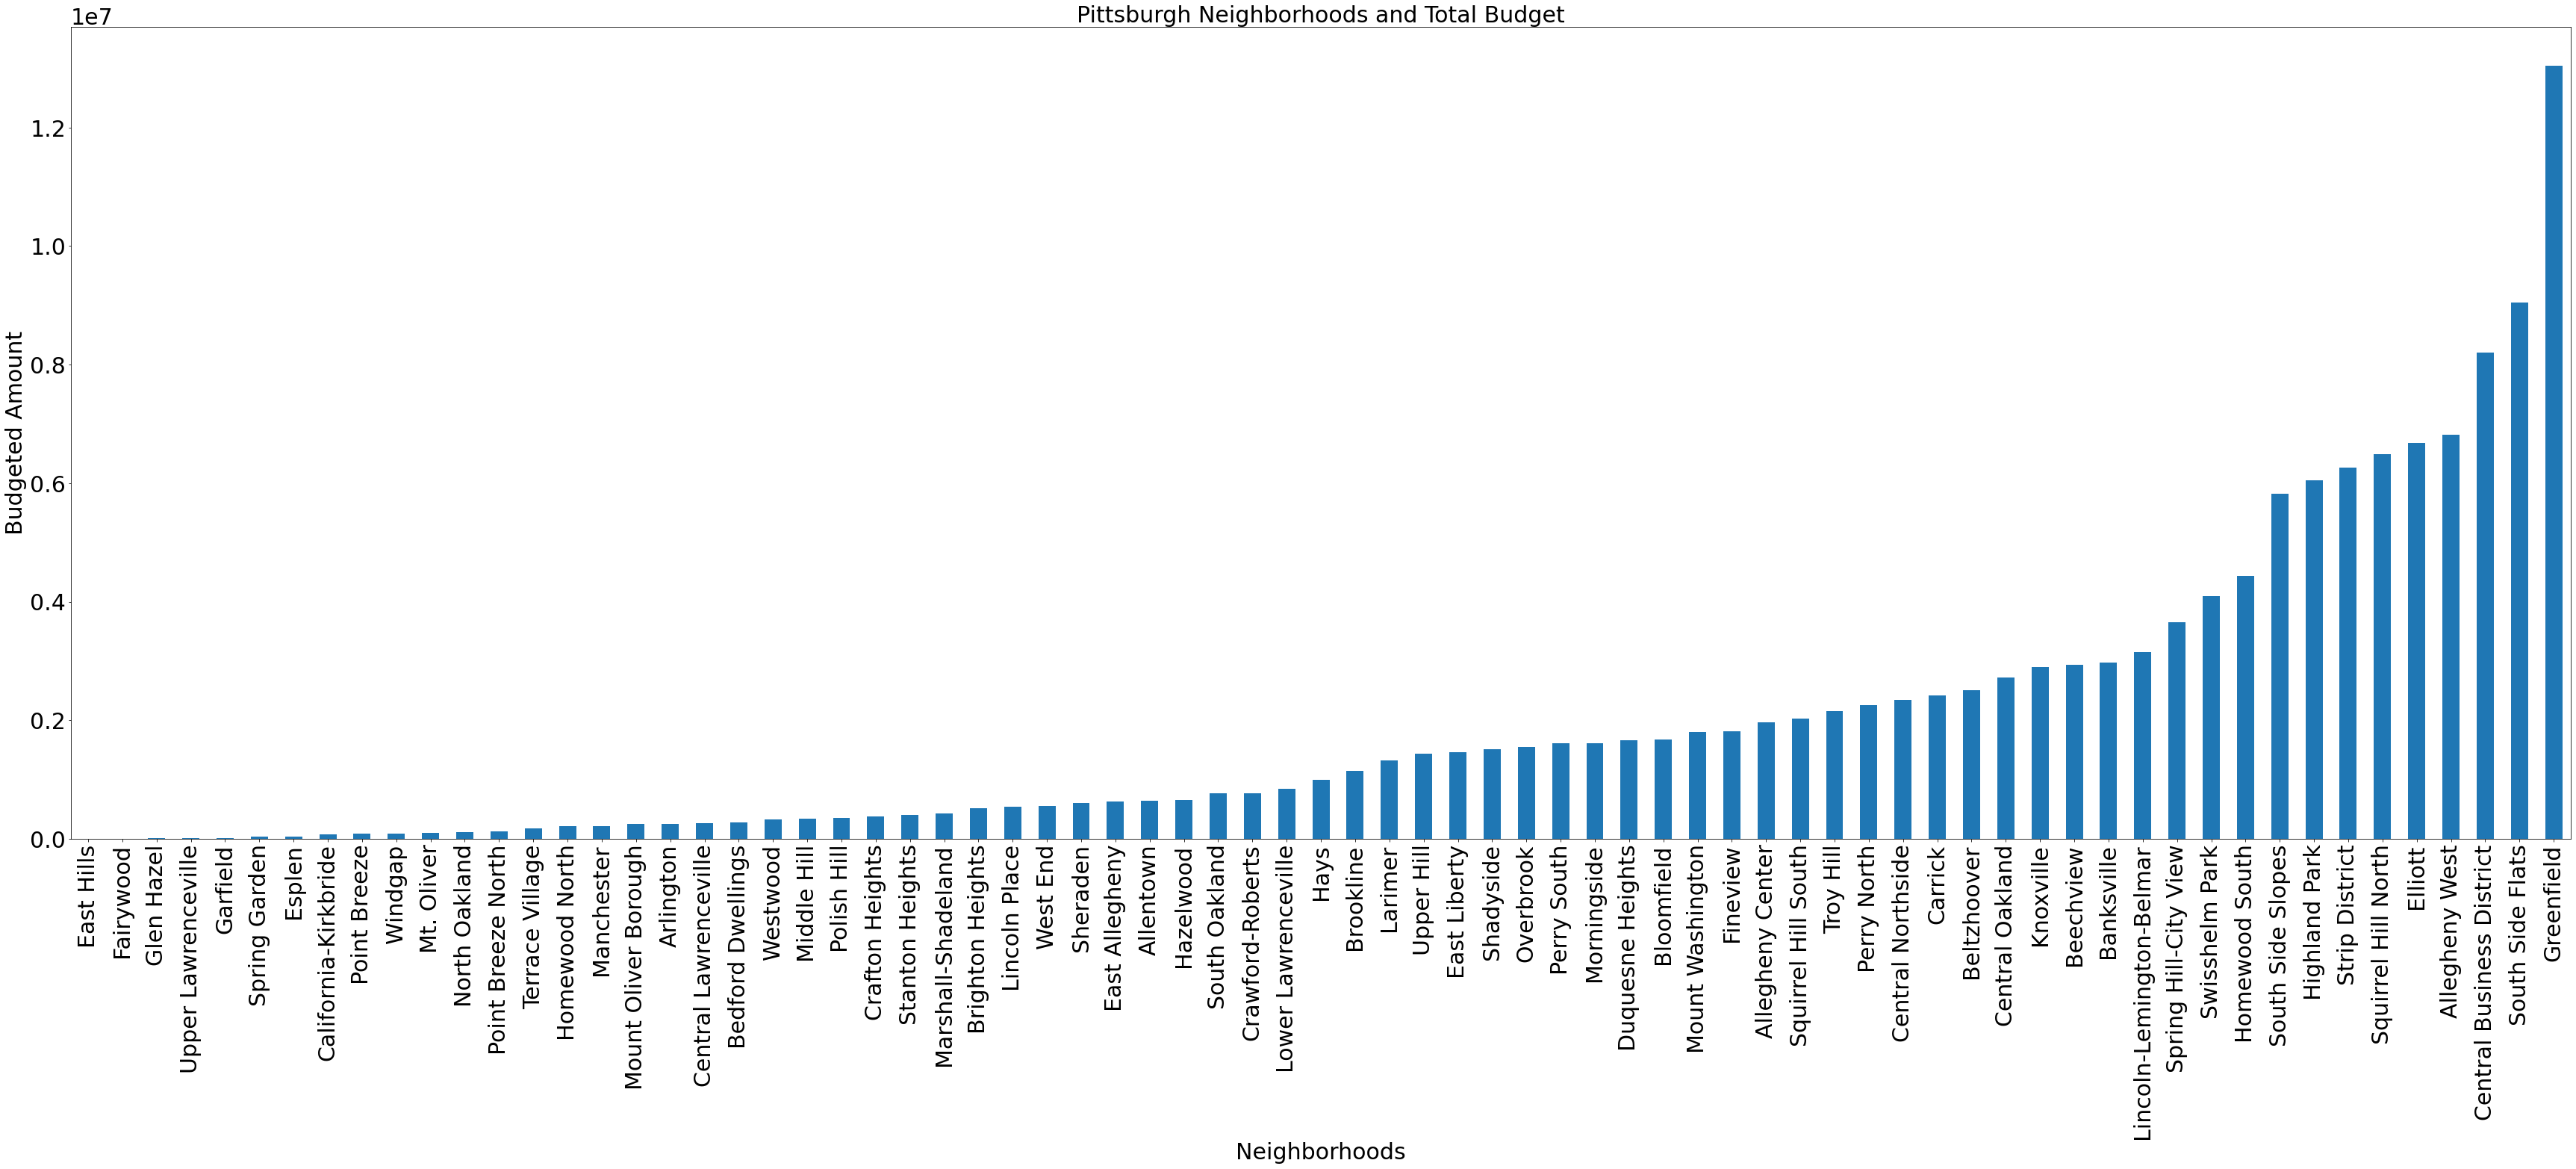

In [8]:
neighborhood_budget_plot = neighborhood_and_budgets.dropna()
neighborhood_budget_plot.plot(x = 'neighborhood', y = 'budgeted_amount', kind = 'bar')
plt.title('Pittsburgh Neighborhoods and Total Budget', size = 30)
plt.xlabel('Neighborhoods', size = 30)
plt.ylabel('Budgeted Amount', size = 30)
plt.rcParams["figure.figsize"] = (60,20)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.show()

For the sake of curiosity, let's take a look at the data if we were to  include only the projects that have been completed or are currently in-progress.

In [6]:
neighborhood_budget_completed = projects[projects['status'].str.contains("Completed|In Progress")]
neighborhood_budget_completed = neighborhood_budget_completed.groupby('neighborhood').sum()['budgeted_amount'].round().sort_values(ascending=True)
neighborhood_budget_completed

neighborhood
Manchester                      3000.0
Garfield                        5200.0
Fairywood                       5200.0
East Hills                      5200.0
Homewood South                  8271.0
Upper Hill                     10969.0
Crawford-Roberts               23156.0
Point Breeze                   25000.0
Central Lawrenceville          30000.0
Sheraden                       35000.0
Esplen                         40800.0
Overbrook                      50000.0
Highland Park                  57250.0
Polish Hill                    60000.0
Terrace Village                82262.0
Windgap                        85000.0
Marshall-Shadeland             85200.0
Middle Hill                    86662.0
South Oakland                 122625.0
Perry North                   125000.0
Allentown                     127500.0
Lincoln Place                 148000.0
Crafton Heights               187313.0
Troy Hill                     216380.0
Mount Washington              250000.0
Stanton Heig

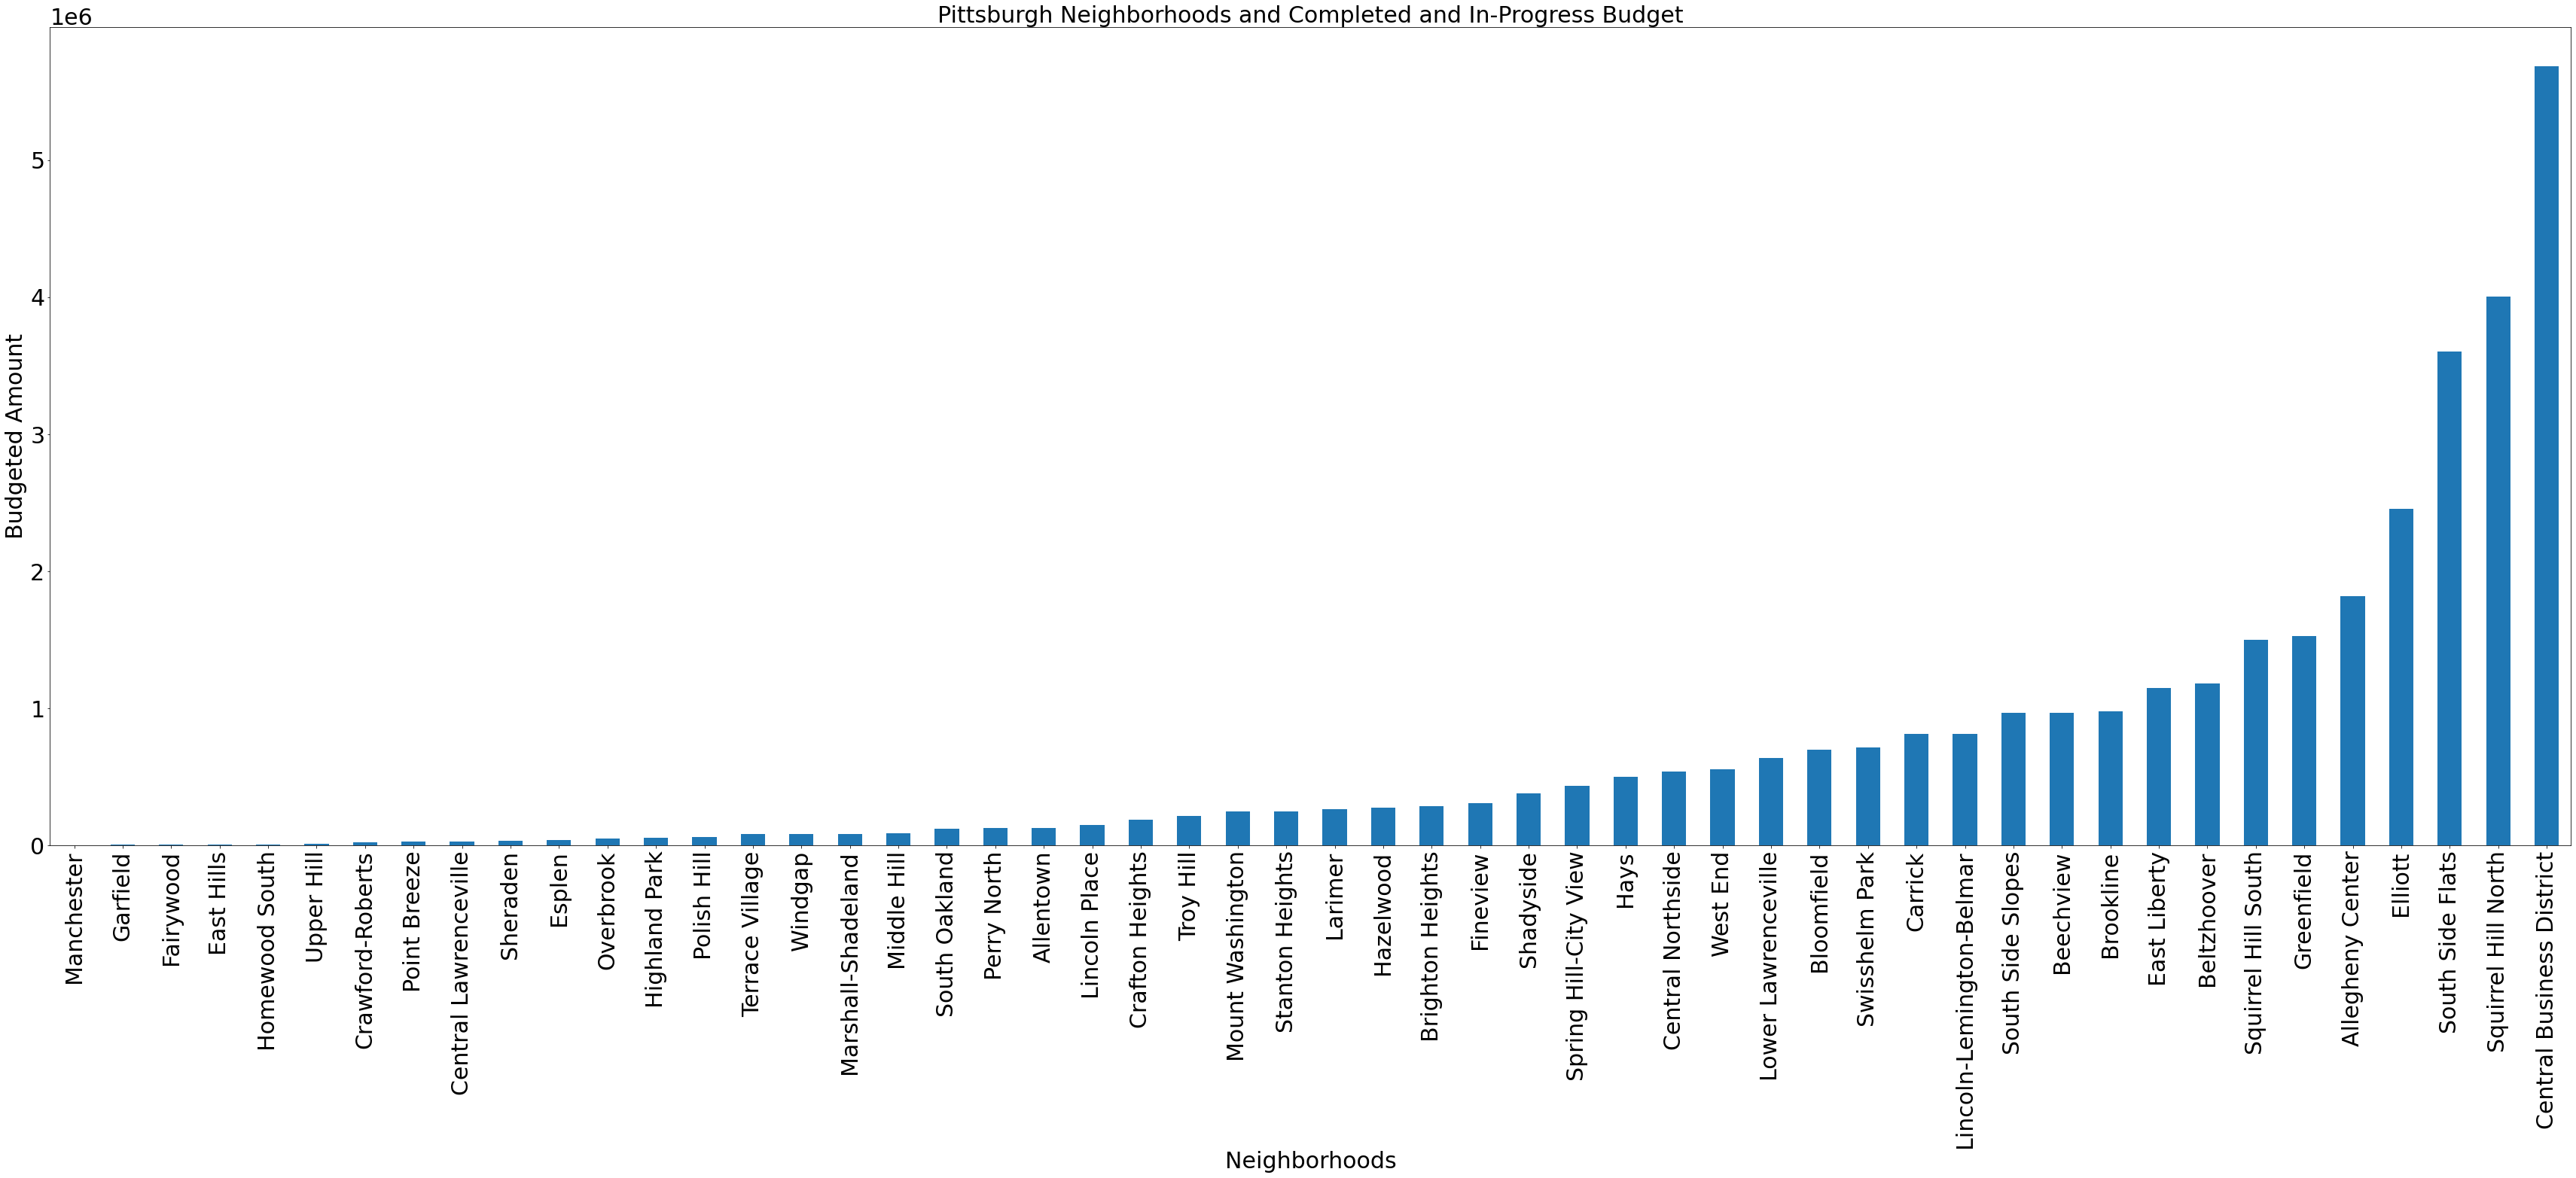

In [7]:
neighborhood_budget_completed_plot = neighborhood_budget_completed.dropna()
neighborhood_budget_completed_plot.plot(x = 'neighborhood', y = 'budgeted_amount', kind = 'bar')
plt.title('Pittsburgh Neighborhoods and Completed and In-Progress Budget', size = 30)
plt.xlabel('Neighborhoods', size = 30)
plt.ylabel('Budgeted Amount', size = 30)
plt.rcParams["figure.figsize"] = (60,20)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.show()

## First Metric Conclusion:
If we were going by already completed and in-progress project budgets, Central Business District would be the neighborhood with the most money invested into it. However, when going by total budget, Greenfield is the best neighborhood in this metric with the most amount of money invested into it.

Next, let's take a look at the data from the 30-day police incident blotter, analyzed by Eyasped Challa:

# Second Metric: Police Incident Reports

Your quality of life can depend on your neighborhood, and crime will always play a constant role in that somehow in any neighborhood. When anyone is looking into a prospective neighborhood, they look at the crime rate since crime statistics are usually good indicators of neighborhood safety, and safety is one of the essential indicators of a best neighborhood. So, for a neighborhood to be considered to be the best by this metric, it must have the lowest amount of incident reports out of all the other neighborhoods.

In [2]:
import math as math
import sys

In [2]:
police_incident = pd.read_csv("Police_Incident_Blotter.csv") 

In [3]:

## List all neighborhoods
neighbourhoods = police_incident['INCIDENTNEIGHBORHOOD'].unique()
print(neighbourhoods)

['Brookline' 'North Oakland' 'Sheraden' 'Bloomfield'
 'Central Business District' 'East Liberty' 'Overbrook' 'Perry South'
 'Carrick' 'Larimer' 'East Hills' 'Lincoln-Lemington-Belmar'
 'South Side Flats' 'Shadyside' 'Central North Side' 'Arlington'
 'Stanton Heights' 'Mount Washington' 'Greenfield' 'Crafton Heights'
 'Homewood South' 'Bluff' 'East Allegheny' 'Allentown'
 'Marshall-Shadeland' 'Central Lawrenceville' 'North Shore' 'Friendship'
 'New Homestead' 'South Side Slopes' 'Northview Heights'
 'Crawford-Roberts' 'Windgap' 'Beechview' 'Brighton Heights' 'Knoxville'
 'Outside State' 'Lincoln Place' 'Middle Hill' 'Homewood West'
 'Central Oakland' 'Manchester' 'Outside City' 'Point Breeze'
 'Regent Square' 'Duquesne Heights' 'Perry North' 'Troy Hill'
 'Strip District' 'Highland Park' 'Upper Hill' 'Allegheny Center'
 'Banksville' 'Hazelwood' 'Polish Hill' 'Chateau' 'Homewood North'
 'Garfield' 'West Oakland' 'Glen Hazel' 'Bon Air' 'Upper Lawrenceville'
 'Spring Hill-City View' 'Bedfor

In [20]:
police_incident.head(3)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,247582194,21045028,0,2021-03-17T14:57:00,"Brookline Blvd & Witt St Pittsburgh, PA 15226",Y,Brookline,6,99,1501 Drivers Required to be Licensed. / 1786 R...,3206.0,4.0,5.0,-80.005904,40.392418
1,247583239,21045077,27,2021-03-17T16:10:00,"Forbes Ave & S Dithridge St Pittsburgh, PA 15213",N,North Oakland,4,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,404.0,8.0,3.0,-79.950226,40.444052
2,247595750,21045154,10,2021-03-17T17:56:00,"3100 Block Huxley St Pittsburgh, PA 15204",Y,Sheraden,6,SIMPLE ASSAULT,2701 Simple Assault.,2022.0,2.0,5.0,-80.062087,40.453472


In [7]:
len(police_incident['INCIDENTNEIGHBORHOOD'].unique())

95

**There are about 95 incident types reported in the documents.**

In [21]:
incident_types = police_incident['INCIDENTHIERARCHYDESC'].unique()

print(len(police_incident['INCIDENTNEIGHBORHOOD'].unique()))

print(incident_types)

95
['99' 'HIT AND RUN' 'SIMPLE ASSAULT' 'NON-VIOLENT DOMESTIC'
 'CRIMINAL TRESPASS' 'AIDED CASE'
 'DUI - HIGHEST RATE OF ALCOHOL - BAC >= .16%' 'FOUND PROPERTY'
 'THEFT FROM AUTO' 'GAMBLING INVESTIGATION' 'THEFT' 'STOLEN PROPERTY'
 'HARRASSMENT/THREAT/ATTEMPT/PHY' 'DOG BITE' 'CRIM MISCHIEF'
 'THEFT BY DECEPTION' 'IDENTITY THEFT' 'RETAIL THEFT (SHOPLIFTING)'
 'BURGLARY' 'TERRORISTIC THREATS' 'DISORDERLY CONDUCT'
 'MISCELLANEOUS FIRE OTHER INVEST CONTINUED' 'PUBLIC DRUNKENESS'
 'AGG-ASSAULT' 'FIRES (SELF STARTING)' 'AGRICULTURAL VANDALISM'
 'STOLEN PROPERTY - OTHER' 'CRIM MISCHIEF (GRAFFITI)' 'HARRASSMENT'
 'DEAD ON ARRIVAL (DOA)' 'RUNAWAYS - JUVENILE'
 'BENCH WARRANT ARREST - NO TIE' 'DUI - GENERAL IMPAIRMENT'
 'MENTAL 201/302' 'ROBBERY OF MOTOR VEHICLE' 'RETSIL THEFT (SHOPLIFTING)'
 'ROBBERY' 'RECEIVING STOLEN PROPERTY' 'FOUND DRUGS' 'DRUG INVESTIGATION'
 'UNAUTHORIZED USE VEHICLE' 'MISSING PERSONS (18+)' 'ACCIDENTAL FIRE'
 'CREDIT CARDS' 'CRIMINAL MISCHIEF' 'MISCELLANEOUS INVESTIGATIO

*Now, there's a bit of information that are not going to be useful to us here, so let's narrow our data*

In [4]:
new_df = police_incident[police_incident.columns.difference(['PK', 'CCR' , 'X' , 'Y','CLEAREDFLAG','INCIDENTZONE', 'INCIDENTLOCATION', 'COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION'])]

In [23]:
new_df.groupby("INCIDENTNEIGHBORHOOD").count().head(5)

,HIERARCHY,INCIDENTHIERARCHYDESC,INCIDENTTIME,INCIDENTTRACT,OFFENSES
INCIDENTNEIGHBORHOOD,,,,,
Allegheny Center,22,22,22,22,22
Allegheny West,2,2,2,2,2
Allentown,71,71,71,71,71
Arlington,30,30,30,30,30
Arlington Heights,3,3,3,3,3


In [5]:
new_df.groupby("INCIDENTNEIGHBORHOOD").count().loc[:,"OFFENSES"][87:]

INCIDENTNEIGHBORHOOD
Troy Hill              22
Upper Hill             13
Upper Lawrenceville    16
West End               13
West Oakland           15
Westwood                9
Windgap                 7
Name: OFFENSES, dtype: int64

In [6]:
new_df = new_df.sort_values(by=['INCIDENTNEIGHBORHOOD']).dropna()

**Let us sort the data by neighborhood and drop rows or columns which contain missing values**

In [7]:
INCIDENTNEIGHBORHOOD_count= new_df['INCIDENTNEIGHBORHOOD'].value_counts(ascending=True)
INCIDENTNEIGHBORHOOD_count = INCIDENTNEIGHBORHOOD_count[:50]

In [26]:
print(INCIDENTNEIGHBORHOOD_count)

Mt. Oliver Boro           1
Allegheny West            2
Outside County            2
Summer Hill               2
Mount Oliver              2
St. Clair                 3
Arlington Heights         3
Hays                      3
Fairywood                 3
Ridgemont                 4
Regent Square             4
Outside State             4
Glen Hazel                5
Swisshelm Park            5
Chartiers City            5
Esplen                    5
East Carnegie             6
Windgap                   7
Oakwood                   9
Westwood                  9
Friendship               10
Spring Garden            11
Terrace Village          11
South Shore              12
Polish Hill              12
Bon Air                  12
West End                 13
Upper Hill               13
Duquesne Heights         14
Outside City             14
Lower Lawrenceville      15
West Oakland             15
Banksville               15
New Homestead            15
Morningside              16
Point Breeze North  

**The safest neighborhood is the one with the lowest crime incident.**

**Let us graph the the crime incident.**

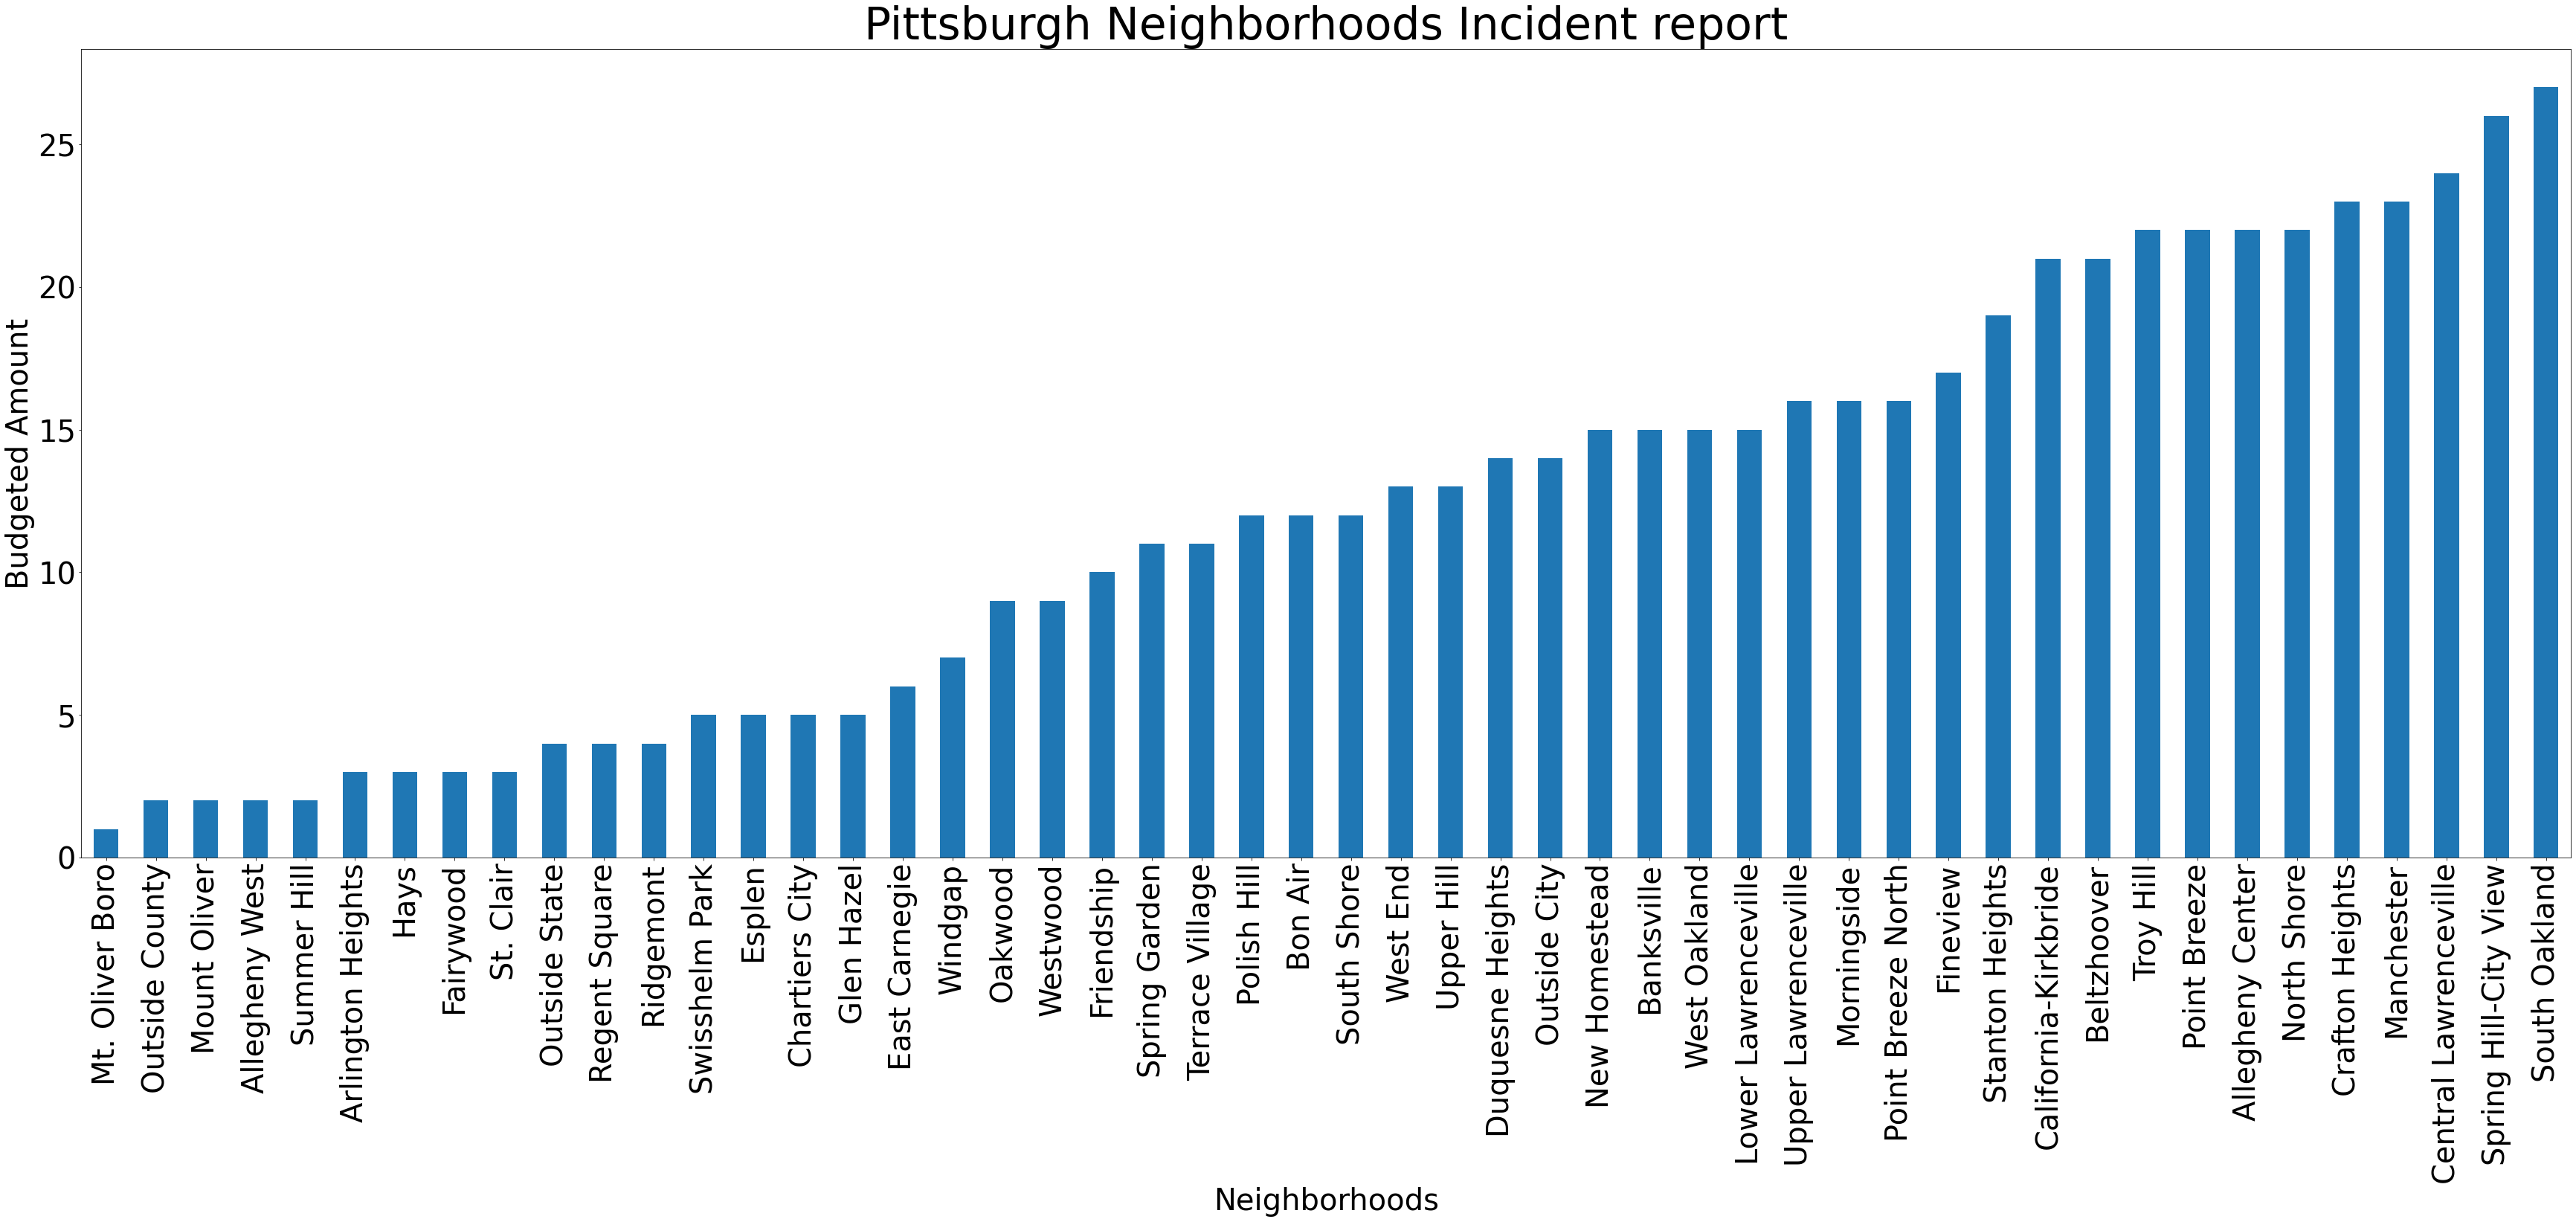

In [14]:
pd.Series(INCIDENTNEIGHBORHOOD_count).plot.bar()
pd.Series(INCIDENTNEIGHBORHOOD_count).plot(x = 'neighborhood', y = 'Incident count', kind = 'bar')
plt.title('Pittsburgh Neighborhoods Incident report', size = 60)
plt.xlabel('Neighborhoods', size = 40)
plt.ylabel('Budgeted Amount', size = 40)
plt.rcParams["figure.figsize"] = (60,20)
plt.rc('xtick', labelsize=40)
plt.rc('ytick', labelsize=40)
plt.show()

## Second Metric Conclusion:
By this metric, the safest neighborhood in Pittsburgh is Mt. Oliver Boro as is the one with the lowest number of incidents.

# Final Metric: 311 Requests Relating to Infrastructure

Why think about a neighborhood's infrastructure? Just ask U.S. Secretary of Transportation, Pete Buttigieg!

![Pete Buttigieg Infrastructure Explanation](https://media.giphy.com/media/IDakGqgM3hGnll4z35/giphy.gif)

From walkways, to roads, and everything under or in between, good infrastructure is key to the quality of life in any area. 

Would you really want to live in a neighborhood where you constantly dealt with things like this on the road every day?

![Hey Arnold Traffic Lights](https://media.giphy.com/media/l4EpeenC1Pa4r9VpC/giphy.gif)

![PGH Bus Sinkhole](https://media4.s-nbcnews.com/j/newscms/2019_44/3072871/191028-pittsburgh-bus-sinkhole-cs-237p_40629b85b427e44bd39ca9f98b74274d.fit-760w.jpg)

Yeah, I wouldn't either.

So, let's go through the city of Pittsburgh's 311 data from over the past six months and sort through the infrastructure related 311 requests. By this metric, the best neighborhood will be the one that has the least amount of infrastructure related 311 requests out of all the others.

In [3]:
import geopandas

In [6]:
#Get 311 data from downloaded file and read the data in CREATED_ON column as dates with Pandas datetime
pgh_311 = pd.read_csv("PGH-311-Data.csv", index_col="CREATED_ON", parse_dates=True)

#Narrow scope of data from October 1, 2020 to April 1, 2021
in_scope_311 = pgh_311.loc["2020-10-01 06:56:00":"2021-04-01 08:02:00"]

#Remove any incomplete request reports from dataframe
in_scope_311 = in_scope_311.dropna()

#Make a dataframe for all infrastructure related 311 requests (i.e. potholes, sinkholes, & etc), then sort by neighborhood
inf_query_mask = in_scope_311["REQUEST_TYPE"].str.contains("Pothole") | in_scope_311["REQUEST_TYPE"].str.contains("Sinkhole") | in_scope_311["REQUEST_TYPE"].str.contains("Landslide") | in_scope_311["REQUEST_TYPE"].str.contains("Water Main Break") | in_scope_311["REQUEST_TYPE"].str.contains("Leak") | in_scope_311["REQUEST_TYPE"].str.contains("Paving Concern/Problem") | in_scope_311["REQUEST_TYPE"].str.contains("Request New") | in_scope_311["REQUEST_TYPE"].str.contains("Replace/Repair ") | in_scope_311["REQUEST_TYPE"].str.contains("Street Light") | in_scope_311["REQUEST_TYPE"].str.contains("Asphalt") | in_scope_311["REQUEST_TYPE"].str.contains("Sewer") | in_scope_311["REQUEST_TYPE"].str.contains("Sewage") | in_scope_311["REQUEST_TYPE"].str.contains("Utility") | in_scope_311["REQUEST_TYPE"].str.contains("Need Cleared") | in_scope_311["REQUEST_TYPE"].str.contains("Obstruction") | in_scope_311["REQUEST_TYPE"].str.contains("Tree Fallen") | in_scope_311["REQUEST_TYPE"].str.contains("Bus Shelter") | in_scope_311["REQUEST_TYPE"].str.contains("Signal") | in_scope_311["REQUEST_TYPE"].str.contains("Guide Rail") 
infrastructure_311 = in_scope_311[inf_query_mask]
infra_requests = infrastructure_311.groupby("NEIGHBORHOOD").count()["REQUEST_TYPE"]

Before we get to which neighborhood is clearly winning infrastructure week, let's see what issues Pittsburgh had over our six month timeframe. Also, for the sake of consistency and preventing the entire dataset from becoming skewed at all, we will not be going over seasonal infrastructure requests such as Snow/Ice Removal. With that out of the way, I wonder what the most common infrastructure issue is going to be! (Knowing Pittsburgh, it's probably gonna be potholes.)

In [3]:
#Show how many times which infrastructure issue has been reported throughout Pittsburgh
infrastructure_311["REQUEST_TYPE"].value_counts()

Potholes                                  1228
Street Light - Repair                      685
Replace/Repair a Sign                      586
Utility Cut - Other                        224
Utility Cut - PWSA                         219
Request New Sign                           170
Leak                                       168
Sinkhole                                   165
Traffic or Pedestrian Signal, Repair       161
Water Main Break                           137
Drainage/Leak                               96
Tree Fallen Across Road                     65
Street Obstruction/Closure                  65
Utility Pole                                64
City Steps, Need Cleared                    50
Guide Rail                                  50
Sewers                                      49
Curb/Request for Asphalt Windrow            49
Tree Fallen Across Sidewalk                 43
Bus Shelter                                 34
Traffic or Pedestrian Signal, Request       34
Paving Concer

And it looks like potholes are the most common infrastructure issue in the city of Pittsburgh by a *mile*! 

Who ever could have guessed that one? /s

Well, now that we've seen just how many infrastructure 311 requests there have been, let's start finding out where they're all coming from throughout the city.

<AxesSubplot:>

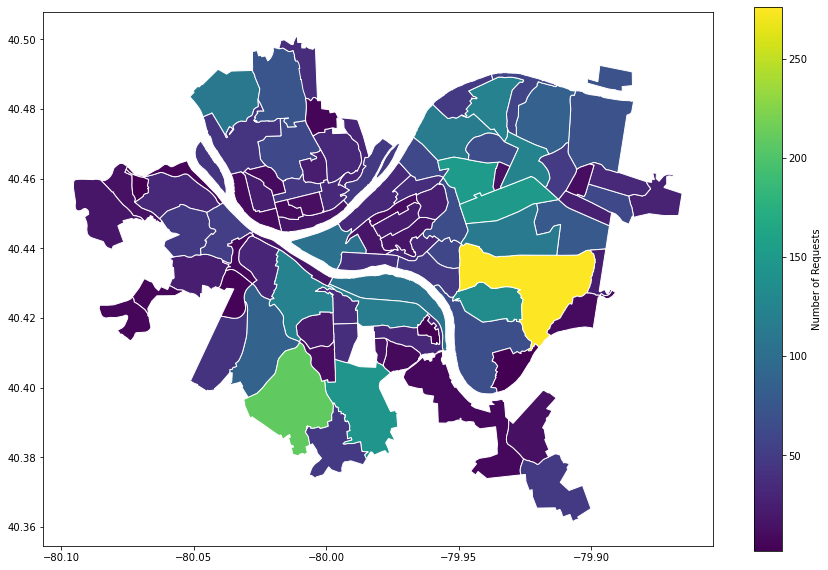

In [4]:
#Graph all neighborhood infrastructure requests to map of Pittsburgh
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
infra_requests_map = neighborhoods.merge(infra_requests, how="left", left_on="hood", right_on="NEIGHBORHOOD")
infra_requests_map.plot(column="REQUEST_TYPE", #Set the data to be used for coloring
                       edgecolor="white", #Set the color of the outlines for each district
                       legend=True, #Show the legend
                       legend_kwds={'label': "Number of Requests"}, #Label the legend
                       figsize=(15,10), #Set the size of the graph
                       )

Well, it looks like Squirrel Hill South definitely has the most infrastructure requests in the city, followed by Brookline. 

It's kind of difficult to tell which neighborhoods have the least requests with so many of them having similar color on this map, though...

Let's make a list of the top 30 neighborhoods with the least infrastructure requests! That should make the best neighborhood in this aspect pretty apparent!

In [19]:
#Get the top 30 neighborhoods sorted in ascending order
print("**Top 30 Pgh. Neighborhoods in Infrastructure**")
print("Note: Higher list position is better.")
print()
infra_requests.sort_values(ascending=True)[:30]

**Top 30 Pgh. Neighborhoods in Infrastructure**
Note: Higher list position is better.



NEIGHBORHOOD
Arlington Heights        2
Glen Hazel               2
Chartiers City           3
Ridgemont                5
Northview Heights        6
Esplen                   6
East Carnegie            7
Oakwood                  7
West End                 8
Hays                     8
St. Clair                9
Allegheny West          10
Swisshelm Park          10
Chateau                 10
California-Kirkbride    10
Homewood West           11
Allegheny Center        12
Bon Air                 12
Bedford Dwellings       12
New Homestead           13
Friendship              14
Windgap                 14
Mt. Oliver              16
Crawford-Roberts        17
North Shore             17
Fairywood               17
Terrace Village         18
South Shore             18
Beltzhoover             22
Fineview                23
Name: REQUEST_TYPE, dtype: int64

## Final Metric Conclusion:
By this metric, it would appear that Arlington Heights and Glen Hazel are tied for best neighborhood since they both have two infrastructure related 311 requests over the past six months.

Congrats to our two winners of Infrastructure Week! 

![Gatsby GIF](https://media.giphy.com/media/sp685iuIEGuys/giphy.gif)

# Conclusion: Best Overall Neighborhood

When going through the top neighborhoods of all three metrics, Allegheny West consistently appears in the top 15. In Capital Projects, Allegheny West is the fourth best neighborhood with a total budget of approximately $6.8 million. In number of reported police incidents, Allegheny West appeared as the neighborhood with the fourth least amount of total police incident reports. In number of 311 infrastructure requests, it appears as one of the neighborhoods tied for 12th place with ten infrastructure related 311 requests. Since this is the only neighborhood to rank this consistently high across all three metrics, it is clear that Allegheny West is the best overall neighborhood in the city of Pittsburgh.